The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

==================== SCENARIO: CASE STUDY 1: BALANCED OUTLOOK ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £550,000
  Holding Period:         15 years
  Fixed Term Length:      5 years
  Initial Mortgage Rate:  4.35%
  Deposit Percentage:     25%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:         £1,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      3.5% / 2.5%
  Remortgage Rate:       4.8% / 1.5%

--- Running 10,000 Simulations ---
Duration: 1.89 seconds

--- Processing Results ---

--- Analysis for: Case Study 1: Balanced Outlook ---

--- Monte Carlo Results Summary ---

--- Cash Scenario ---
  Net Gain:
mean      £87,488
std      £159,968
min     £-347,339
5%      £-148,615
50%       £72,769
95%      £372,161
max   

/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£87,488' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.76%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_roi['mean'] = f"{stats_roi['mean']:.2f}%"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£897,757' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users/

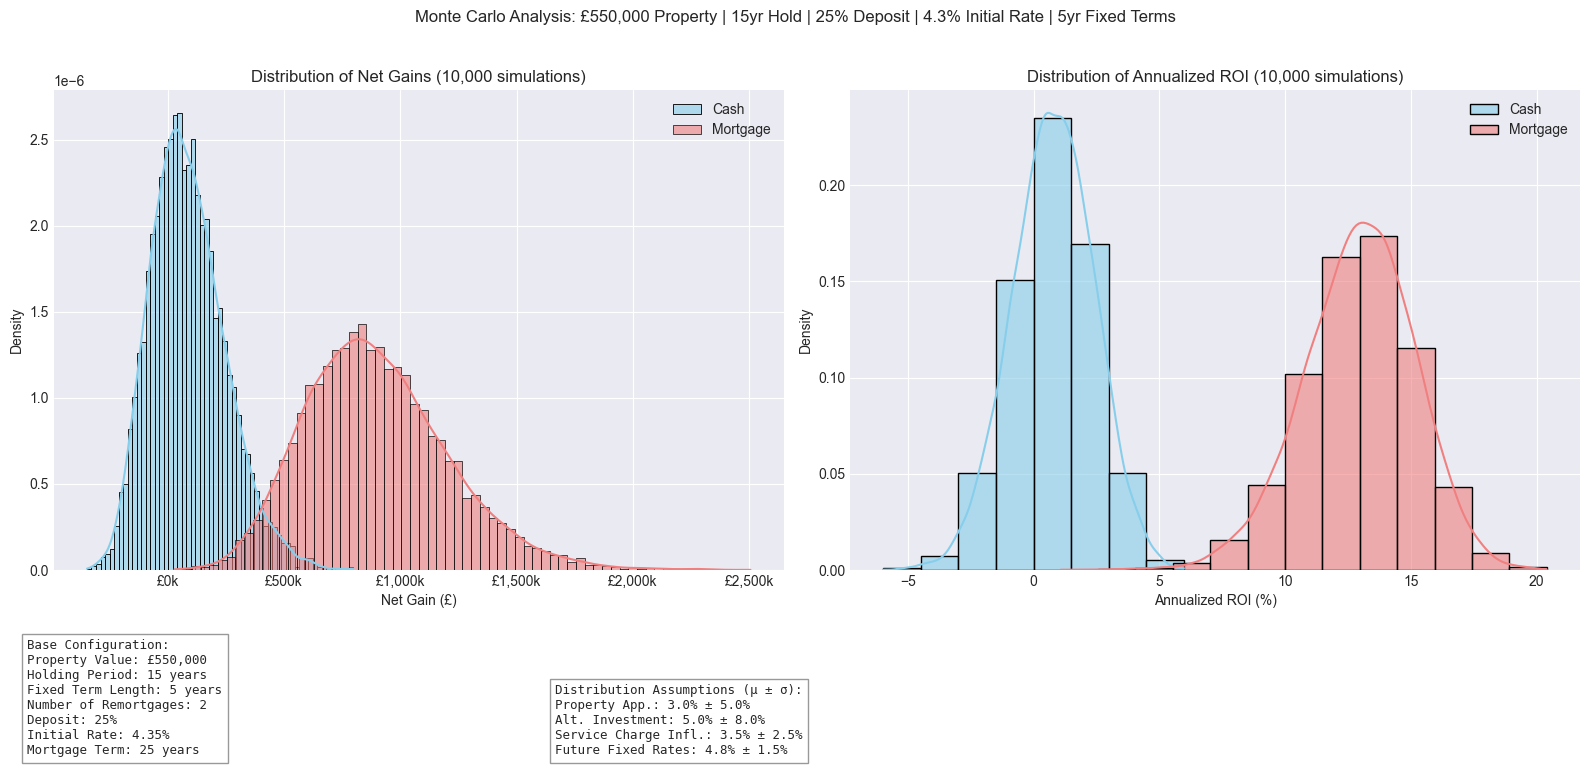

==================== END SCENARIO: CASE STUDY 1: BALANCED OUTLOOK ====================


==================== SCENARIO: CASE STUDY 2: HIGHER INFLATION/RATES WORLD ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £550,000
  Holding Period:         15 years
  Fixed Term Length:      5 years
  Initial Mortgage Rate:  4.35%
  Deposit Percentage:     25%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:         £1,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       2.0% / 5.0%
  Alt. Investment Ret.:    4.5% / 8.0%
  Service Chg Infl.:      4.5% / 3.0%
  Remortgage Rate:       6.0% / 2.0%

--- Running 10,000 Simulations ---


In [ ]:
# --- Imports and Setup ---
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mortgage_mc import get_base_config, run_monte_carlo_simulation
from mc_analysis import (
    process_mc_results,
    display_summary_stats,
    display_probability_analysis,
    plot_mc_distributions
)
from scenario_analysis import run_and_analyze_scenario, compare_scenarios

# Dictionary to store results DataFrames
scenario_results = {}

# --- Case Study 1: Balanced Outlook ---
config1_overrides = {
    "property_value_initial": 550000.0,
    "holding_period_years": 15,
    "fixed_term_length_years": 5,
    "initial_mortgage_interest_rate_annual": 0.0435 # Assumed 4.35% initial 5yr fix
}
dist1_assumptions = {
    "prop_app_mean": 0.03, "prop_app_std_dev": 0.05,
    "alt_inv_mean": 0.05, "alt_inv_std_dev": 0.08,
    "sc_inf_mean": 0.035, "sc_inf_std_dev": 0.025,
    "remort_rate_mean": 0.0475, "remort_rate_std_dev": 0.015
}
scenario_results["Balanced"] = run_and_analyze_scenario(
    "Case Study 1: Balanced Outlook",
    config1_overrides,
    dist1_assumptions
)

# --- Case Study 2: Higher Inflation/Rates World ---
config2_overrides = {
    "property_value_initial": 550000.0,
    "holding_period_years": 15,
    "fixed_term_length_years": 5, # Still aiming for 5yr fixes
    "initial_mortgage_interest_rate_annual": 0.0435
}
dist2_assumptions = {
    "prop_app_mean": 0.02, "prop_app_std_dev": 0.05,
    "alt_inv_mean": 0.045, "alt_inv_std_dev": 0.08,
    "sc_inf_mean": 0.045, "sc_inf_std_dev": 0.03,
    "remort_rate_mean": 0.06, "remort_rate_std_dev": 0.02
}
scenario_results["High Rates"] = run_and_analyze_scenario(
    "Case Study 2: Higher Inflation/Rates World",
    config2_overrides,
    dist2_assumptions
)

# --- Case Study 3: Stagnant Property / Lower Returns ---
config3_overrides = {
    "property_value_initial": 550000.0,
    "holding_period_years": 15,
    "fixed_term_length_years": 5,
    "initial_mortgage_interest_rate_annual": 0.0435
}
dist3_assumptions = {
    "prop_app_mean": 0.01, "prop_app_std_dev": 0.04,
    "alt_inv_mean": 0.03, "alt_inv_std_dev": 0.05,
    "sc_inf_mean": 0.03, "sc_inf_std_dev": 0.025,
    "remort_rate_mean": 0.045, "remort_rate_std_dev": 0.015
}
scenario_results["Stagnant"] = run_and_analyze_scenario(
    "Case Study 3: Stagnant Property / Lower Returns",
    config3_overrides,
    dist3_assumptions
)

# Compare scenarios
compare_scenarios(scenario_results)